#### 1b: write code (with AI assistant) to build a naive Bayes and KNN classifier. You can use the spam_dataset.csv to test it out. 

In [39]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

In [41]:
train_df = pd.read_csv('train_spam_data.csv')
test_df = pd.read_csv('test_spam_data.csv')

In [43]:
train_df.head()

,win,click,team,claim,reminder,Category
0,1,1,0,0,0,Spam
1,0,1,1,0,0,Ham
2,0,0,0,1,0,Spam
3,0,0,1,0,1,Ham
4,1,0,0,0,0,Spam


In [45]:
test_df.head()

,win,click,team,claim,reminder,Category
0,0,0,0,1,0,Spam


In [47]:
# Split the data into features (X) and target (y)
X_train = train_df[['win', 'click', 'team', 'claim', 'reminder']]
y_train = train_df['Category']

X_test = test_df[['win', 'click', 'team', 'claim', 'reminder']]
y_test = test_df['Category']  

# Convert target labels to binary (Spam = 1, Ham = 0)
y_train = y_train.map({'Spam': 1, 'Ham': 0})
y_test = y_test.map({'Spam': 1, 'Ham': 0})

# 1. Naive Bayes Implementation
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)  # Train the model

# Get probabilities using Naive Bayes on the test set
nb_probabilities = nb_model.predict_proba(X_test)
nb_predictions = nb_model.predict(X_test)

# Print the Naive Bayes results
print("Naive Bayes Prediction:", 'Spam' if nb_predictions[0] == 1 else 'Ham')
print(f"Naive Bayes P(Spam|test_data): {nb_probabilities[0][1]:.4f}")
print(f"Naive Bayes P(Ham|test_data): {nb_probabilities[0][0]:.4f}")

# 2. K-Nearest Neighbors (K=3) Implementation
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)  # Train the model

# Get probabilities using KNN on the test set
knn_probabilities = knn_model.predict_proba(X_test)
knn_predictions = knn_model.predict(X_test)

# Print the KNN results
print("\nKNN (K=3) Prediction:", 'Spam' if knn_predictions[0] == 1 else 'Ham')
print(f"KNN P(Spam|test_data): {knn_probabilities[0][1]:.4f}")
print(f"KNN P(Ham|test_data): {knn_probabilities[0][0]:.4f}")

Naive Bayes Prediction: Spam
Naive Bayes P(Spam|test_data): 1.0000
Naive Bayes P(Ham|test_data): 0.0000

KNN (K=3) Prediction: Spam
KNN P(Spam|test_data): 1.0000
KNN P(Ham|test_data): 0.0000


#### 2b. Write code (with AI assistant) to fit the model using your favorite classifier (NB, KNN, or Decision tree); using the spam_dataset.csv, ask to output an ROC curve and AUC score. (Hint: if you fit a decision tree, you might want to reduce max_depth) 

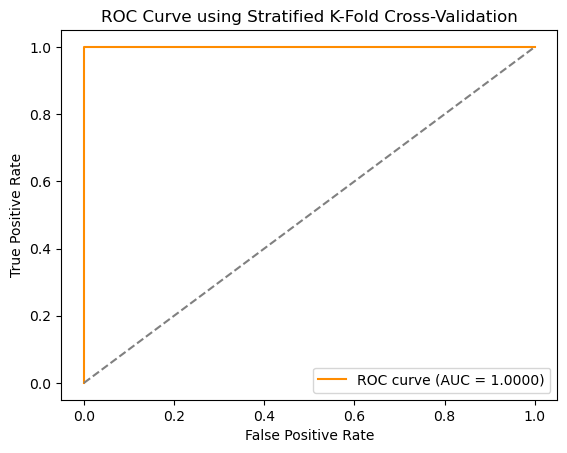

AUC Score: 1.0000


In [58]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

X  = train_df[['win', 'click', 'team', 'claim', 'reminder']]
y = train_df['Category'].map({'Spam': 1, 'Ham': 0})
# Initialize Naive Bayes model
nb_model = GaussianNB()

# Perform Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5)
# Arrays to hold the true and predicted values across all folds
y_true_all = []
y_pred_prob_all = []

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    nb_model.fit(X_train, y_train)
    
    # Predict the probabilities for the positive class (Spam)
    y_pred_prob = nb_model.predict_proba(X_test)[:, 1]
    
    # Collect true and predicted values
    y_true_all.extend(y_test)
    y_pred_prob_all.extend(y_pred_prob)

# Convert lists to numpy arrays
y_true_all = np.array(y_true_all)
y_pred_prob_all = np.array(y_pred_prob_all)

# Compute ROC curve and AUC score across all folds
fpr, tpr, thresholds = roc_curve(y_true_all, y_pred_prob_all)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve using Stratified K-Fold Cross-Validation')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC Score: {roc_auc:.4f}')


In [54]:
X

,win,click,team,claim,reminder
0,1,1,0,0,0
1,0,1,1,0,0
2,0,0,0,1,0
3,0,0,1,0,1
4,1,0,0,0,0
5,0,0,0,0,1
6,1,0,1,0,0
7,0,1,1,0,0
8,0,0,0,1,0
9,0,1,1,0,0
